In [1]:
import pandas as pd

APPL = '/kaggle/input/apple-stock-data/apple_stock_data.csv'
df = pd.read_csv(filepath_or_buffer=APPL, parse_dates=['Date'])
df['year'] = df['Date'].dt.year
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume,year
0,2023-11-02 00:00:00+00:00,176.665985,177.570007,177.779999,175.460007,175.520004,77334800,2023
1,2023-11-03 00:00:00+00:00,175.750671,176.649994,176.820007,173.350006,174.240005,79763700,2023
2,2023-11-06 00:00:00+00:00,178.317520,179.229996,179.429993,176.210007,176.380005,63841300,2023
3,2023-11-07 00:00:00+00:00,180.894333,181.820007,182.440002,178.970001,179.179993,70530000,2023
4,2023-11-08 00:00:00+00:00,181.958893,182.889999,183.449997,181.589996,182.350006,49340300,2023


Let's look at the price-volume correlations first.

In [2]:
df[['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']].corr()

,Adj Close,Close,High,Low,Open,Volume
Adj Close,1.000000,0.999958,0.997834,0.997151,0.994280,-0.105114
Close,0.999958,1.000000,0.997783,0.997170,0.994248,-0.105376
High,0.997834,0.997783,1.000000,0.996285,0.996162,-0.080047
Low,0.997151,0.997170,0.996285,1.000000,0.997739,-0.124372
Open,0.994280,0.994248,0.996162,0.997739,1.000000,-0.115153
Volume,-0.105114,-0.105376,-0.080047,-0.124372,-0.115153,1.000000


What do we see? We see two things:
1. The closing price and the adjusted closing price are different, meaning that we probably want to use the adjusted close for our analysis
2. The prices and volume are slightly negatively correlated, meaning that we might expect to see that as prices rise volume will decline, on average.

Let's look at the time series of the adjusted closing prices.

<Axes: xlabel='Date', ylabel='Adj Close'>

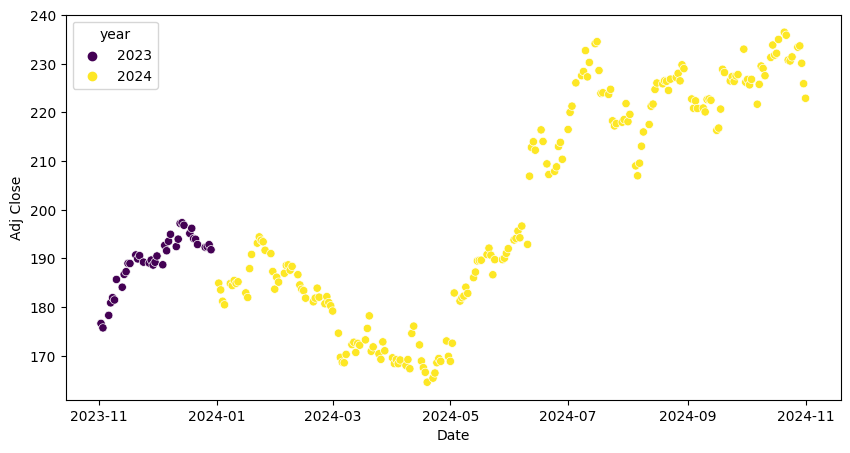

In [3]:
import matplotlib.pyplot as plt
from seaborn import scatterplot

FIGSIZE = (10, 5)
plt.figure(figsize=FIGSIZE)
scatterplot(data=df, x='Date', y='Adj Close', hue='year', palette='viridis')

Here we see that we don't have a lot of data, just from two years. But in that time we see three trends: one up, another down, and then a third that is broadly up with some reversals. Let's have a look at the price/volume relationship.

<Axes: xlabel='Adj Close', ylabel='Volume'>

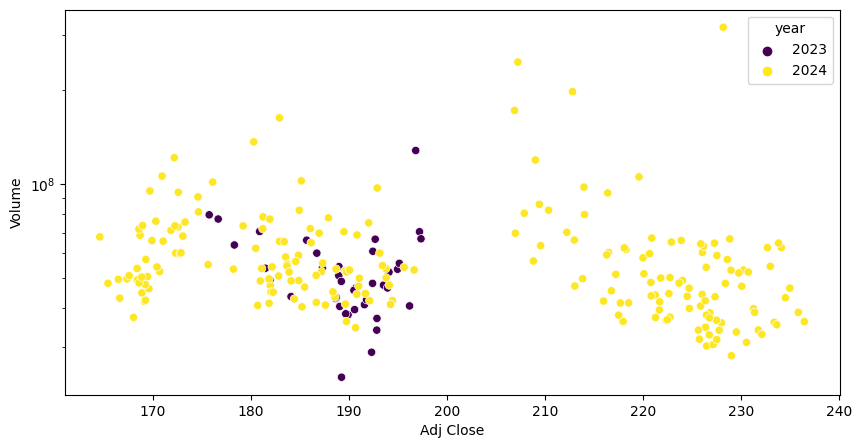

In [4]:
plt.figure(figsize=FIGSIZE)
plt.yscale(value='log')
scatterplot(data=df, x='Adj Close', y='Volume', hue='year', palette='viridis')

What do we see? If we plot the log of the Volume as a function of the price, we don't see much. We really just see two distinct blobs, separated due to a big one-day price change when the price went from below 200 to above 200. Let's try another look and see if a trendline shows anything. 

<Axes: xlabel='Adj Close', ylabel='Volume'>

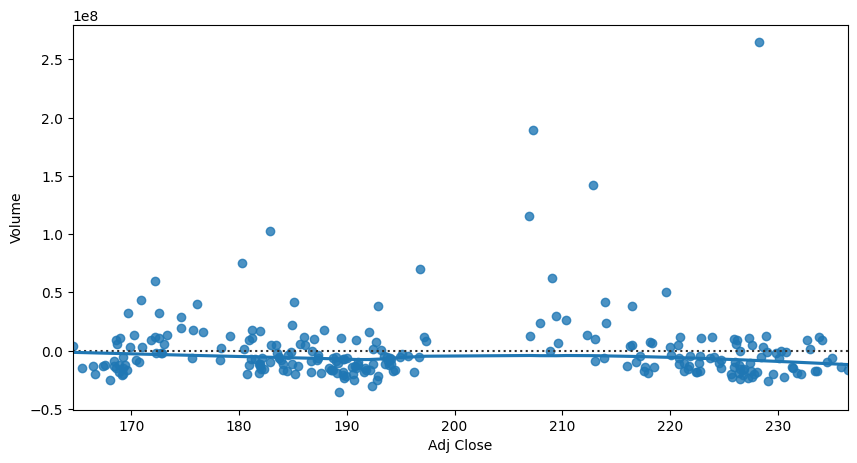

In [5]:
from seaborn import residplot

plt.figure(figsize=FIGSIZE)
residplot(data=df, x='Adj Close', y='Volume', lowess=True)

What do we see? Our trendline is in line with the low negative correlation we saw above. Otherwise the plot doesn't betray much of a relationship between the price and volume.